In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

# Model 1

In [4]:
t = np.arange(1, 11)

A1 = np.zeros((len(t),3))

A1[:,0] = np.ones(len(t))
A1[:,1] = t
A1[:,2] = t**2

b = np.array([14, 20, 21, 24, 15, 45, 67, 150, 422, 987])

In [5]:
A1

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [6]:
Q1, R1 = linalg.qr(A1)

In [7]:
print(np.shape(Q1))
print(np.shape(R1))

(10, 3)
(3, 3)


In [8]:
coeffs_1 = linalg.solve(R1, Q1.transpose() @ b)
coeffs_1

array([ 281.16666667, -183.58333333,   23.50757576])

In [9]:
def I_1(t, coeffs):
    # Get coefficients from computed x1
    a0, a1, a2 = coeffs
    return a0 + a1*t + a2*t**2

# Model 2

In [10]:
A2 = A1.copy()
A2[:, 2] = np.exp(t)
Q2, R2 = linalg.qr(A2)

In [11]:
coeffs_2 = linalg.solve(R2, Q2.transpose() @ b)
coeffs_2

array([8.77707281, 2.8920139 , 0.04357073])

In [12]:
def I_2(t, coeffs):
    a0, a1, a2 = coeffs
    return a0 + a1*t + a2*np.exp(t)

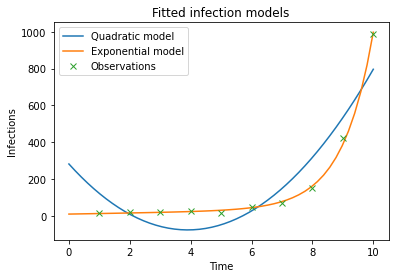

In [16]:
ts = np.linspace(0, 10)

plt.plot(ts, I_1(ts, coeffs_1), label='Quadratic model')
plt.plot(ts, I_2(ts, coeffs_2), label='Exponential model')

plt.plot(t, b, ls='', marker='x', label='Observations')

plt.title('Fitted infection models');
plt.xlabel('Time')
plt.ylabel('Infections')
plt.legend();

Compute sum of squared residuals:

In [15]:
print("Quadratic model residual 2-norm:    {:8.4f}".format(linalg.norm(A1 @ coeffs_1 - b)))
print("Exponential model residual 2-norm:  {:8.4f}".format(linalg.norm(A2 @ coeffs_2 - b)))

Quadratic model residual 2-norm:    340.2117
Exponential model residual 2-norm:   42.0309
